In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [179]:
Titanic = pd.read_csv("Titanic-Dataset.csv")
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


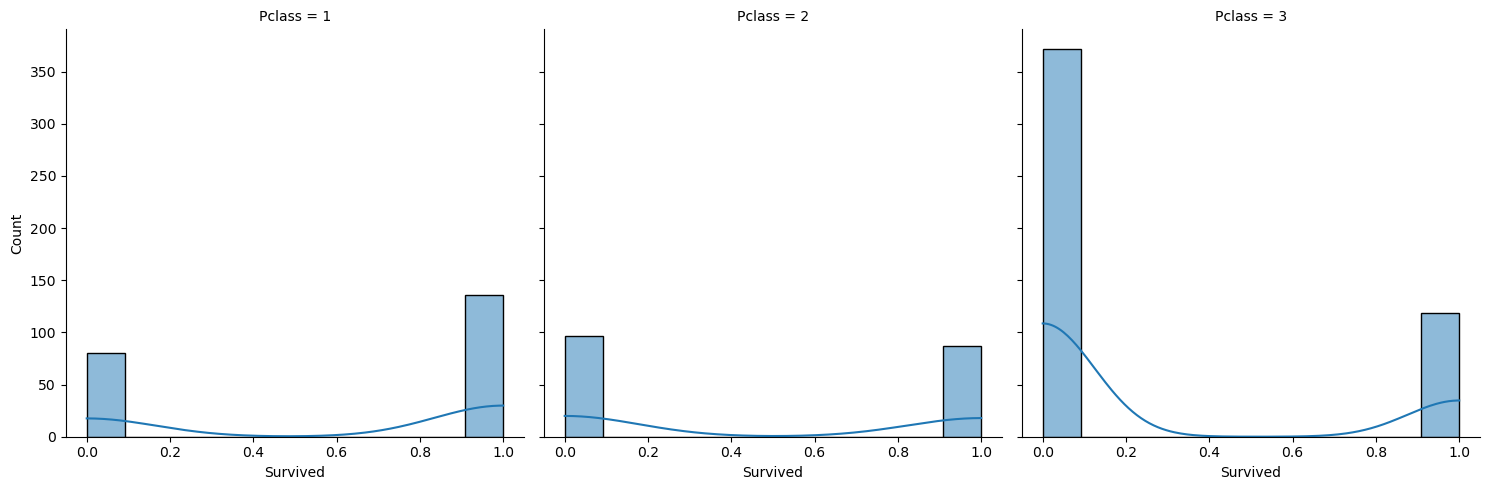

In [180]:
sns.displot(data=Titanic, x="Survived", col="Pclass", kde=True)

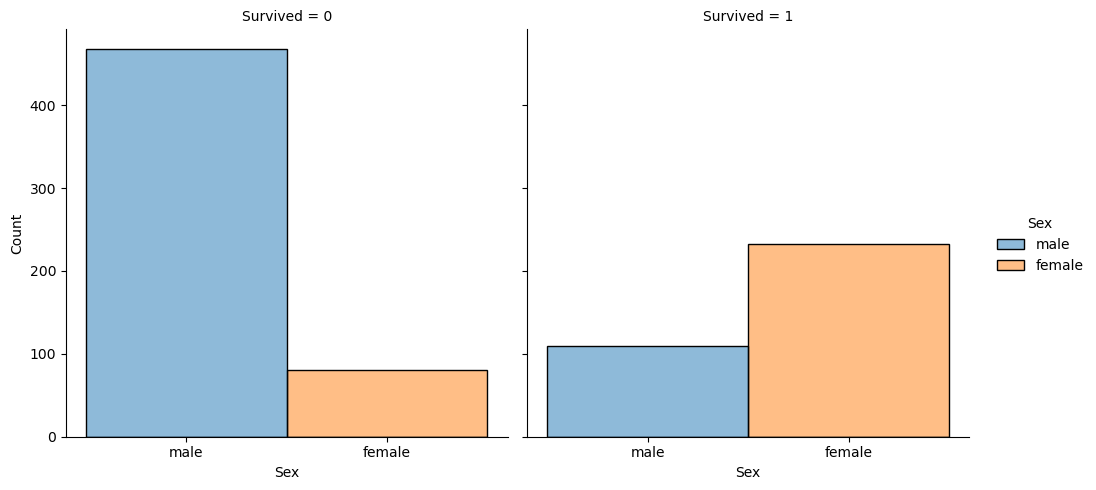

In [181]:
sns.displot(data=Titanic, x="Sex", col="Survived", hue="Sex", kde=True)

In [182]:
Titanic['Age'].fillna(Titanic['Age'].median(), inplace=True)

columns_to_encode = ['Name', 'Sex', 'Cabin', 'Ticket', 'Embarked']

label_enc = LabelEncoder()

for col in columns_to_encode:
    if col in Titanic.columns:
        Titanic[col] = Titanic[col].astype(str)
        Titanic[col] = label_enc.fit_transform(Titanic[col])
    else:
        print(f"Column {col} not found in the DataFrame")

columns_to_drop = ['Name', 'Cabin', 'Ticket', 'Embarked']
Titanic = Titanic.drop(columns=columns_to_drop, axis=1)
Titanic.dropna(inplace=True)

Titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [183]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int32(1), int64(5)
memory usage: 52.3 KB


In [184]:
Titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


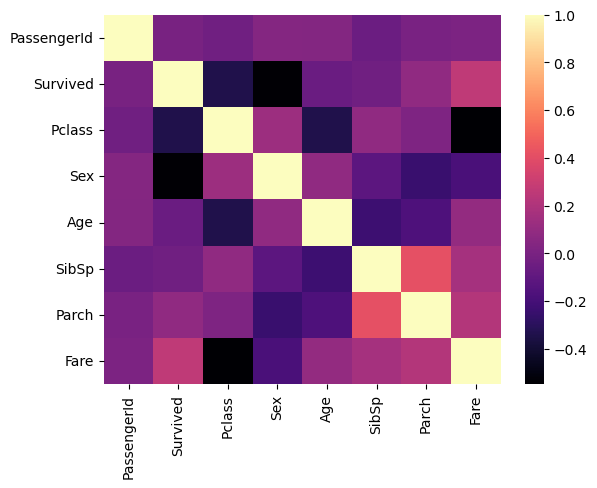

In [185]:
sns.heatmap(Titanic.corr(), cmap="magma")
plt.show()

In [186]:
X = Titanic.drop(columns=['Pclass', 'Sex'])
y = Titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [187]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 42)
log.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [188]:
pred = print(log.predict(X_test))

[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0
 1 1 0 1 1 0 0 0 1]


In [189]:
print(y_test)

709    1
439    0
840    0
720    1
39     1
      ..
821    1
633    0
456    0
500    0
430    1
Name: Survived, Length: 268, dtype: int64
